Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-14 04:06:21--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-14 04:06:21--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-14 04:06:21 (39.6 MB/s) - ‘



Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

**Respuesta 1:**
- CustomerID: Es un identificador para cada cliente.

- Gender: Indica el género del cliente, si Masculino o Femenino.

- Age: Representa la edad del cliente.

- Annual Income (k$): Es el ingreso anual del cliente en miles de dólares.

- Spending Score (1-100): Es un puntaje asignado por el centro comercial, que refleja el comportamiento de gasto del cliente, donde 1 representa el gasto más bajo y 100 el más alto.

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [5]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [12]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']]

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



**Respuesta 2:** Es importante normalizar los datos para que todas las variables estén en la misma escala, ya que K-means es sensible a las diferencias en las escalas de las variables.

 La normalización es una técnica de preprocesamiento de datos que consiste en escalar las variables a un rango común. Esto se hace para evitar que las variables con escalas mayores dominen el análisis.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


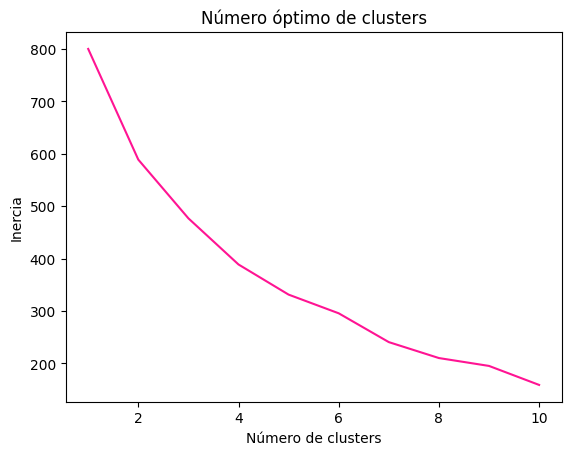

In [33]:

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos los resultados
plt.plot(range(1, 11), inertia,color="deeppink")
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Número óptimo de clusters')
plt.show()



Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

**Respuesta 3:** Según la gráfica del método del codo, parece que 5 clusters serían una opción apropiada. Este número proporciona un buen equilibrio entre minimizar la varianza dentro de los clusters y evitar el sobreajuste.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [9]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [18]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        4  
1        4  
2        3  
3        4  
4        4  


In [19]:
data["Cluster"].value_counts()

,count
Cluster,
4,54
0,47
2,40
1,39
3,20


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

**Respuesta 4:** Los resultados muestran que los 200 clientes han sido segmentados en 5 grupos o clústeres distintos, etiquetados del 0 al 4. La distribución de clientes en estos clústeres no es uniforme, lo que indica que algunos perfiles de clientes son más comunes que otros.

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [22]:
# Agrupamos los datos por cluster y calculamos los promedios
cluster_description = data.groupby('Cluster').mean()
cluster_description

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,83.872340,0.574468,55.638298,54.382979,48.851064
1,159.743590,0.487179,39.871795,86.102564,19.358974
2,161.025000,0.550000,32.875000,86.100000,81.525000
3,24.100000,0.600000,46.250000,26.750000,18.350000
4,55.648148,0.592593,25.185185,41.092593,62.240741


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



**Respuesta 5:** Los clusters muestran diferencias claras en términos de edad, ingreso y puntaje de gasto. El grupo 0 está compuesto por personas mayores con ingresos y gastos moderados, mientras que el grupo 1 incluye adultos con altos ingresos pero bajo gasto, posiblemente más conservadores. El cluster 2 representa adultos jóvenes con alto ingreso y alto nivel de gasto, lo que sugiere un estilo de vida activo y consumista. El grupo 3 está formado por personas de mediana edad con bajos ingresos y bajo gasto, quizás con limitaciones económicas. Finalmente, el cluster 4 agrupa a los más jóvenes, con ingresos medios-bajos pero con un gasto considerablemente alto, lo que podría reflejar un comportamiento de consumo impulsivo o aspiracional.

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

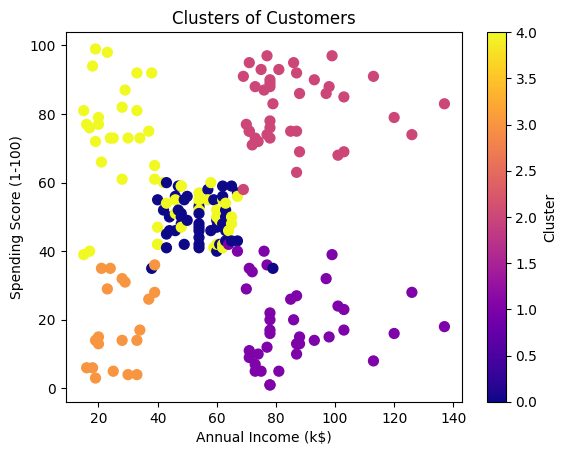

In [32]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='plasma', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.colorbar(label='Cluster')
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

**Respuesta 6:** Observando la gráfica de dispersión, se pueden identificar cinco grupos visualmente bien definidos. Cada grupo se distingue por la combinación de ingreso anual y puntaje de gasto:

1. Un grupo (color morado) con **ingreso alto y bajo gasto**.
2. Otro grupo (rosado) con **ingreso alto y alto gasto**.
3. Un grupo (naranja) con **ingreso bajo y bajo gasto**.
4. Otro (amarillo) con **ingreso bajo y alto gasto**.
5. Finalmente, un grupo más central (azul oscuro), con **ingreso medio y gasto medio**.

Estos patrones muestran que los clusters tienen fronteras bastante limpias y no hay mucha superposición entre ellos, lo cual indica que el modelo de clustering ha segmentado a los clientes de manera eficaz según sus patrones de consumo e ingresos.



Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

**Respuesta 7:**
- **Cluster 0**: *Adultos mayores con consumo moderado*

Esto porque tienen la edad promedio más alta (56 años), un ingreso medio (54.38k$) y un puntaje de gasto también moderado (48.85).

- **Cluster 1**: *Profesionales conservadores*

Esto porque son adultos de unos 40 años, con ingresos altos (86.10k$) pero bajo gasto (19.36). Aparentan ser personas económicamente exitosas pero cuidadosas con sus gastos.

- **Cluster 2**: *Jóvenes con alto poder adquisitivo*

Esto porque son adultos jóvenes (33 años) con altos ingresos (86.10k$) y alto puntaje de gasto (81.53).

- **Cluster 3**: *Clientes con limitaciones económicas*

Esto porque son personas de mediana edad (46 años), pero con los ingresos y el puntaje de gasto más bajos (26.75k$ y 18.35 respectivamente). Este grupo parece tener menos capacidad y disposición para gastar.

- **Cluster 4**: *Jóvenes consumidores aspiracionales*

Son el grupo más joven (25 años), con ingreso medio-bajo (41.09k$) pero gasto alto (62.24). Aunque no tienen ingresos altos, su alto nivel de gasto sugiere que priorizan el consumo, posiblemente motivados por tendencias, redes sociales o aspiraciones de estilo de vida.
